In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

### Задание:
#### Используя файл Web1.ipynb (он в полезных ссылках):

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.

2. Проведите анализ — что приводит к ухудшению точности нейронной сети?

3. Что приводит к увеличению ее точности?

(1797, 64)


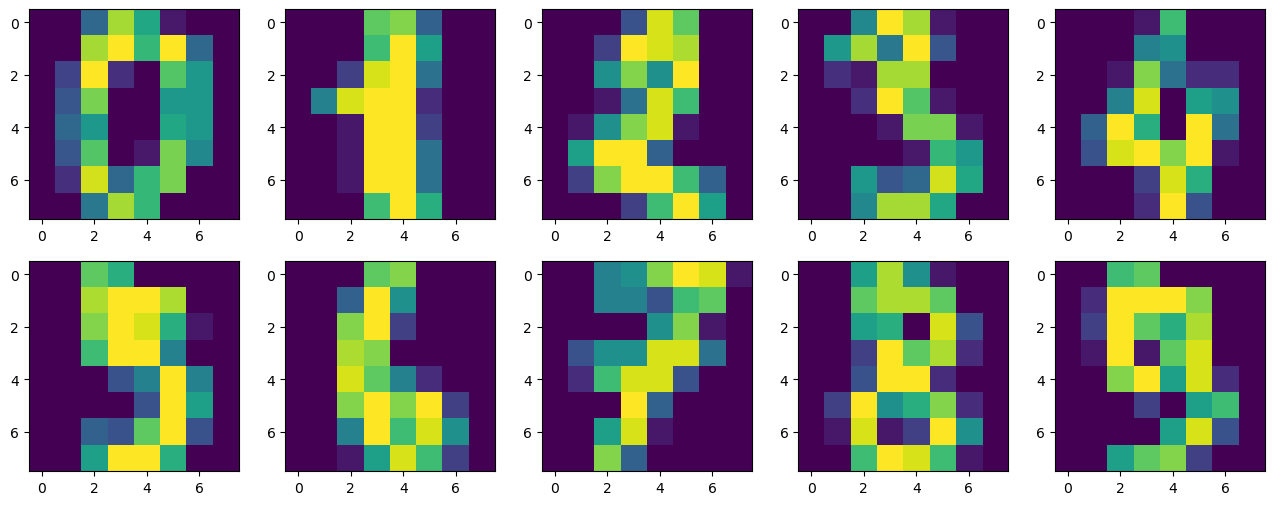

In [2]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [3]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [6]:
# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [8]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [9]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваивание случайных весов
np.random.seed(0)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 100

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    #  с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

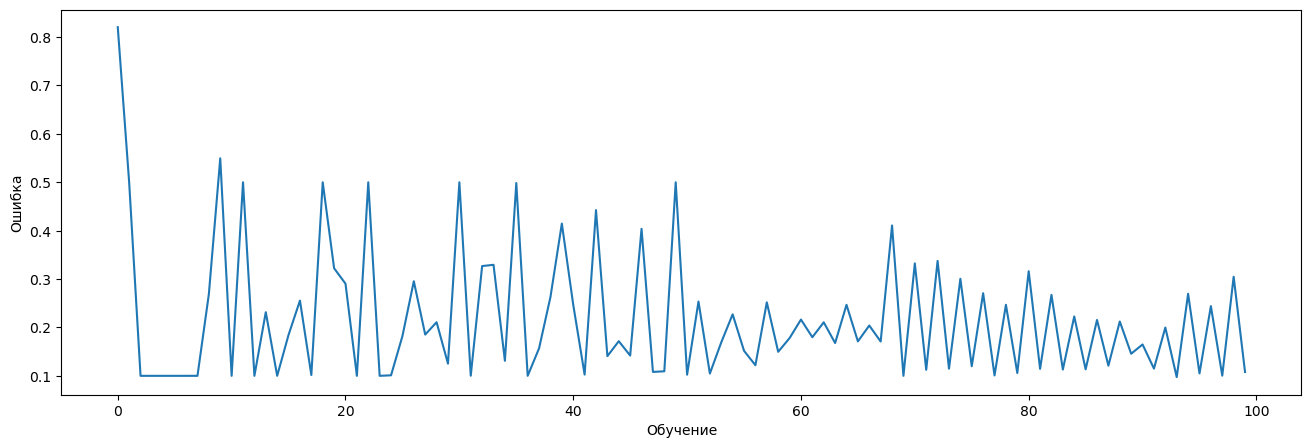

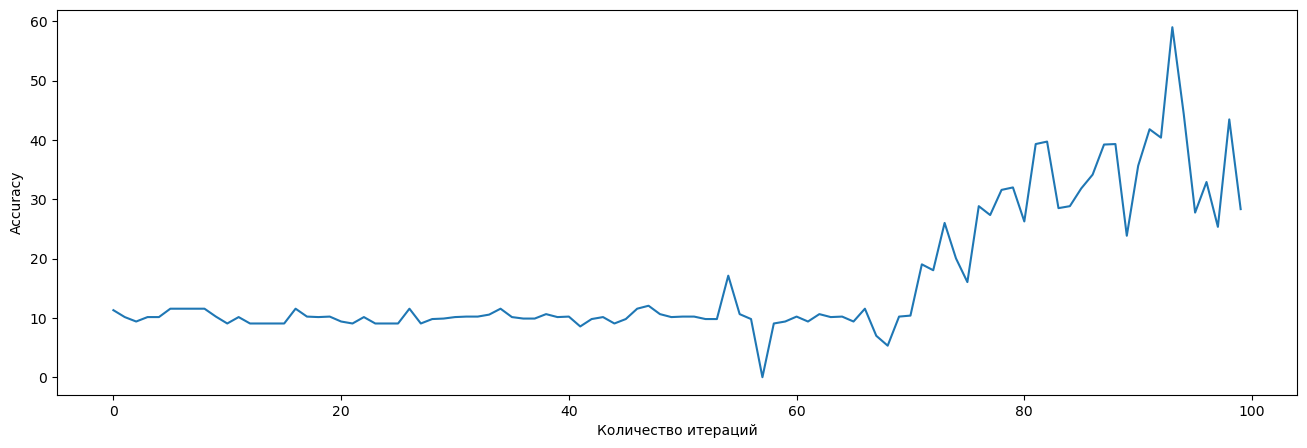

In [10]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [11]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

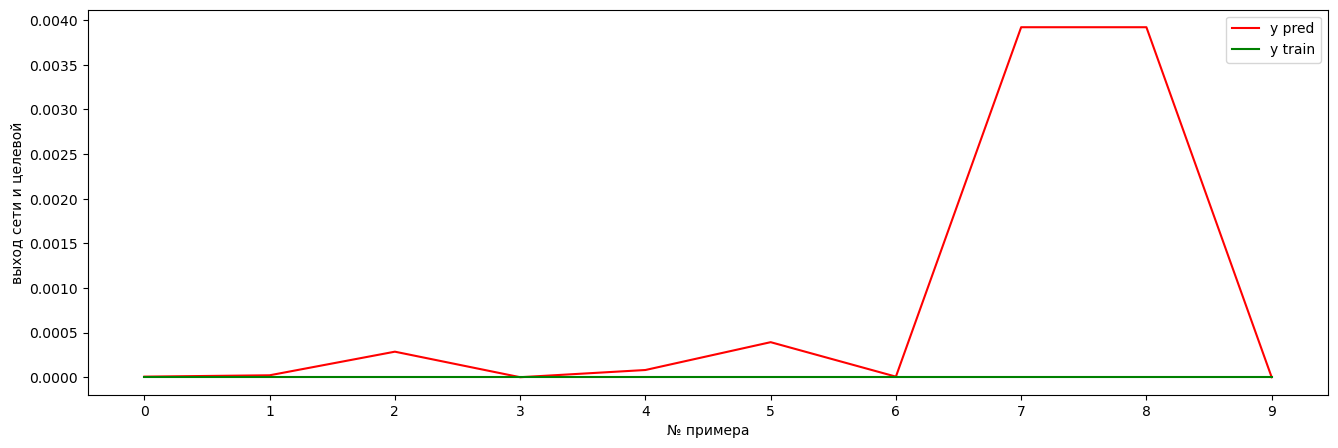

accuracy на обучении 28.35%


In [12]:
N = 10
label = 1
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

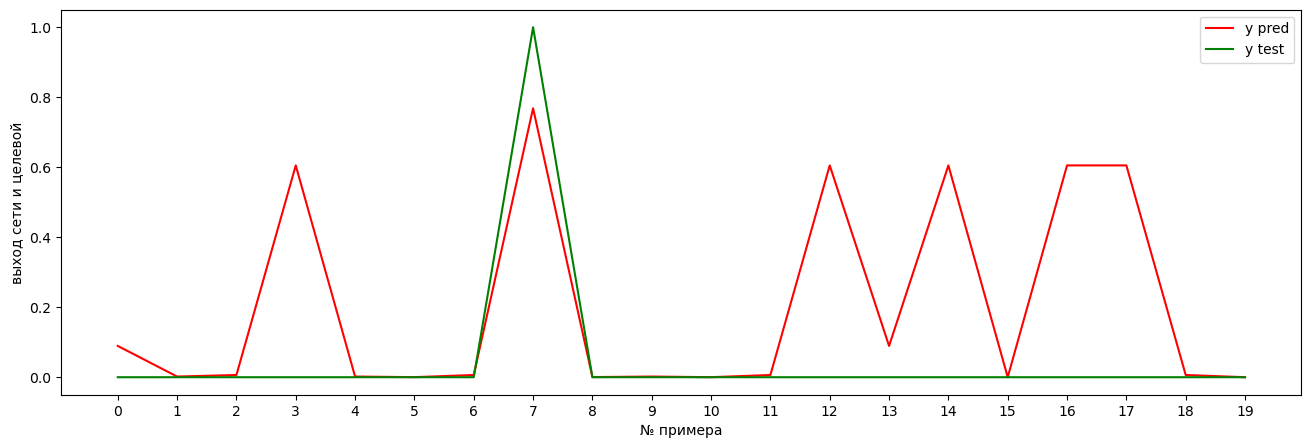

accuracy на тесте 25.08%


In [13]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

In [14]:
def train_nn(X_train, y_train, 
             neuron_numb=5, 
             learning_rate=0.1, 
             num_epochs=100, 
             check_param='', 
             min_value=1, 
             max_value=10, 
             step=1):
    # Обучение нейронной сети

    # определим число нейронов скрытого слоя
    if check_param == 'neuron_numb':
        neuron_numb = np.arange(min_value, max_value+step, step)
    else:
        neuron_numb = neuron_numb

    # скорость обучения (learning rate)
    if check_param == 'learning_rate':
        learning_rate = np.arange(min_value, max_value+step, step)
    else:
        learning_rate = learning_rate

    # количество итераций
    if check_param == 'num_epochs':
        num_epochs = np.arange(min_value, max_value+step, step)
    else:
        num_epochs = num_epochs

    # массив для ошибок, чтобы потом построить график
    results = pd.DataFrame()
    params = []
    vals = []
    errs = []
    mtrs = []
    last_mtrs = []
    last_errs = []
    best_mtrs = []
    
    parameter = ''
    if check_param == 'neuron_numb':
        parameter = neuron_numb
    elif check_param == 'learning_rate':
        parameter = learning_rate
    elif check_param == 'num_epochs':
        parameter = num_epochs
        
    for val in parameter:
        #print(f'train nn with {check_param}={val}...')
        
        if check_param == 'neuron_numb':
            neuron_numb = val
        elif check_param == 'learning_rate':
            learning_rate = val
        elif check_param == 'num_epochs':
            num_epochs = val
        
        params.append(check_param)
        vals.append(val)
    
        errors = []
        metrics = []
        
        # присваивание случайных весов
        np.random.seed(0)
        w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
        w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

        # процесс обучения
        for i in range(num_epochs):

            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            # обратное распространение (back propagation)
            #  с использованием градиентного спуска
            layer2_error = layer2 - y_train  # производная функции потерь
            layer2_grad = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_grad.dot(w1.T)
            layer1_grad = layer1_error * sigmoid_deriv(layer1)

            w1 -= layer1.T.dot(layer2_grad) * learning_rate
            w0 -= layer0.T.dot(layer1_grad) * learning_rate

            # ошибка модели
            error = np.mean(np.abs(layer2_error))
            errors.append(error)

            # метрики качества
            preds = np.argmax(layer2, axis=1)
            labels = np.argmax(y_train, axis=1)
            accuracy = (preds == labels).sum() * 100 / len(labels)
            metrics.append(accuracy)
            
        errs.append(errors)
        mtrs.append(metrics)
        best_mtrs.append(max(metrics))
        last_mtrs.append(metrics[-1])
        last_errs.append(errors[-1])
        #print(f'best_metric={max(metrics)}')
        
    results['param'] = params
    results['val'] = vals
    results['errors'] = errs
    results['last_error'] = last_errs
    results['metrics'] = mtrs
    results['last_metric'] = last_mtrs
    results['best_metric'] = best_mtrs
        
    return results

Сначала посмотрим результаты на тренировочной выборке в зависимости от параметров.

Рассмотрим параметр neuron_numb - число нейронов скрытого слоя.<br>
Проверим значения от 1 до 50 с шагом 1.<br>
Скорость обучения зададим 0.01 и количество итераций 100.

In [15]:
%%time
res_neuron_numb = train_nn(X_train, y_train, 
             neuron_numb=5, 
             learning_rate=0.01, 
             num_epochs=100, 
             check_param='neuron_numb', 
             min_value=1, 
             max_value=50, 
             step=1)

CPU times: user 38.5 s, sys: 2.37 s, total: 40.8 s
Wall time: 24.5 s


In [16]:
res_neuron_numb[['val','last_error','last_metric','best_metric']].sort_values(by='best_metric', ascending=False).head(10)

,val,last_error,last_metric,best_metric
48,49,0.027974,96.758105,96.758105
44,45,0.030251,96.674979,96.674979
49,50,0.030454,96.591854,96.591854
43,44,0.031616,96.508728,96.508728
32,33,0.033941,96.425603,96.425603
37,38,0.032489,96.342477,96.342477
30,31,0.032006,96.259352,96.259352
42,43,0.031450,96.259352,96.259352
47,48,0.029716,96.176226,96.176226
28,29,0.032856,96.176226,96.176226


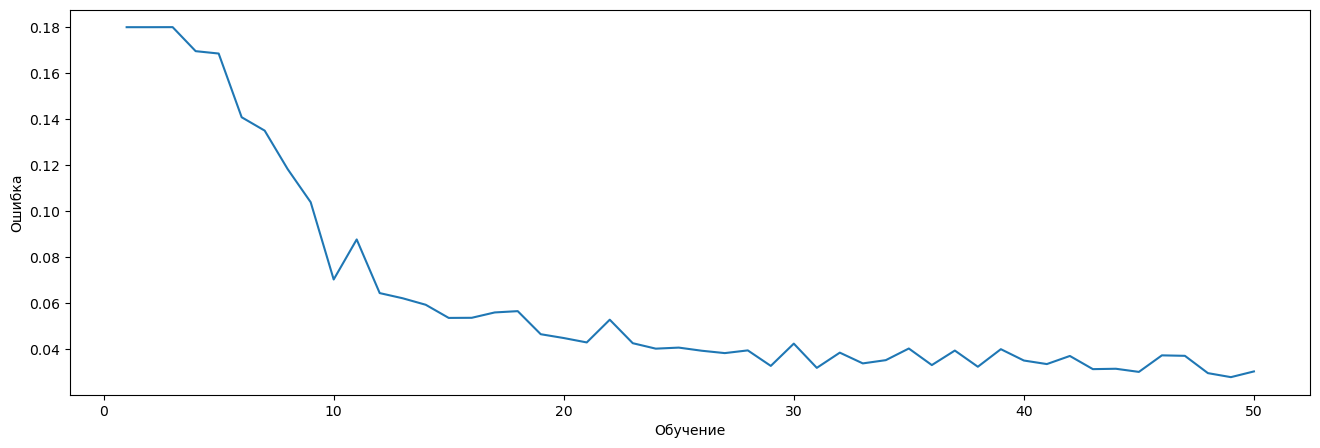

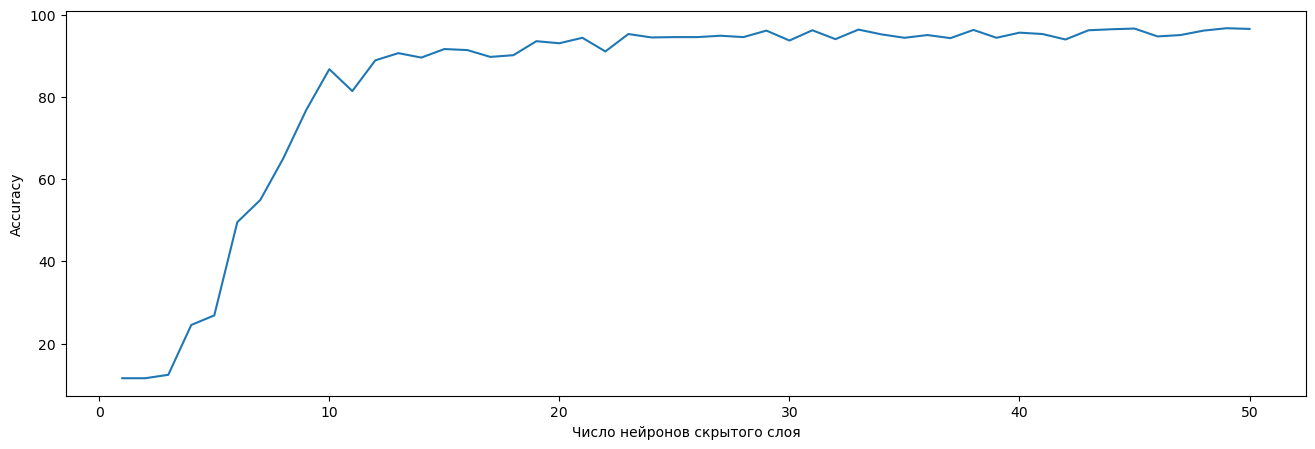

In [17]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(res_neuron_numb['val'],res_neuron_numb['last_error'])
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(res_neuron_numb['val'],res_neuron_numb['best_metric'])
plt.xlabel('Число нейронов скрытого слоя')
plt.ylabel('Accuracy')
plt.show()

Получилось, что чем больше нейронов скрытого слоя, тем лучше метрика качества. Но, начиная с некоторого значения, метрика качества растет очень медленно. <br>
Выберем оптимальное число нейронов скрытого слоя 49, чтобы избежать переобучения.

Теперь рассмотрим параметр learning_rate - скорость обучения. <br>
Проверим значения от 0.001 до 0.5 с шагом 0.01.<br>
Число нейронов скрытого слоя зададим 49 и количество итераций 100.

In [18]:
%%time
res_learning_rate = train_nn(X_train, y_train, 
             neuron_numb=49, 
             learning_rate=0.01, 
             num_epochs=100, 
             check_param='learning_rate', 
             min_value=0.001, 
             max_value=0.5, 
             step=0.005)

CPU times: user 2min 13s, sys: 5.12 s, total: 2min 18s
Wall time: 44.2 s


In [19]:
res_learning_rate[['val','last_error','last_metric','best_metric']].sort_values(by='best_metric', ascending=False).head(10)

,val,last_error,last_metric,best_metric
4,0.021,0.025003,96.342477,96.342477
3,0.016,0.024124,95.428096,95.428096
1,0.006,0.039359,95.178720,95.178720
2,0.011,0.032556,94.679967,94.679967
6,0.031,0.020223,94.596841,94.596841
8,0.041,0.024810,92.518703,92.518703
7,0.036,0.030413,91.853699,91.853699
24,0.121,0.023449,91.687448,91.770574
82,0.411,0.022738,90.606816,91.105569
11,0.056,0.025270,91.022444,91.022444


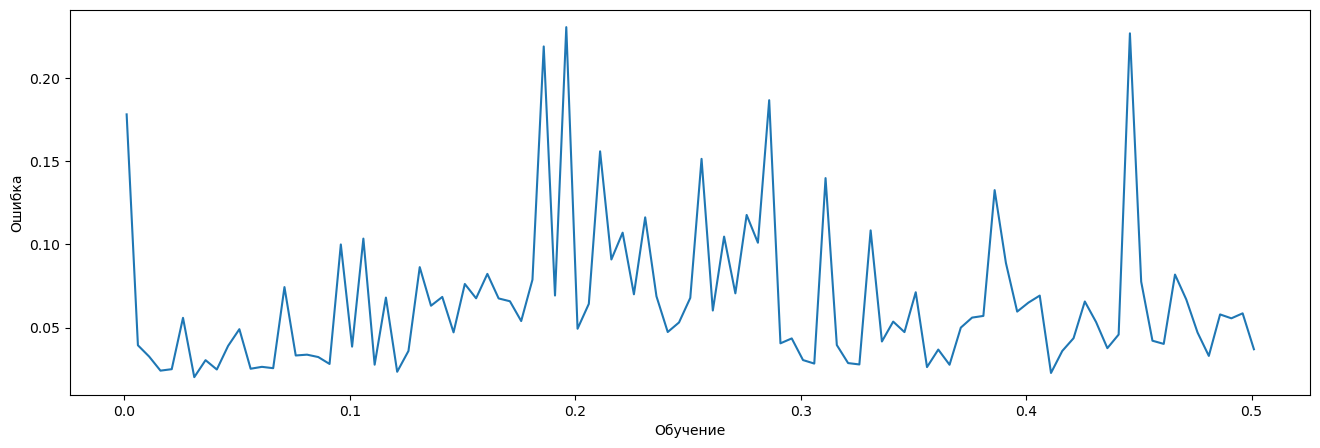

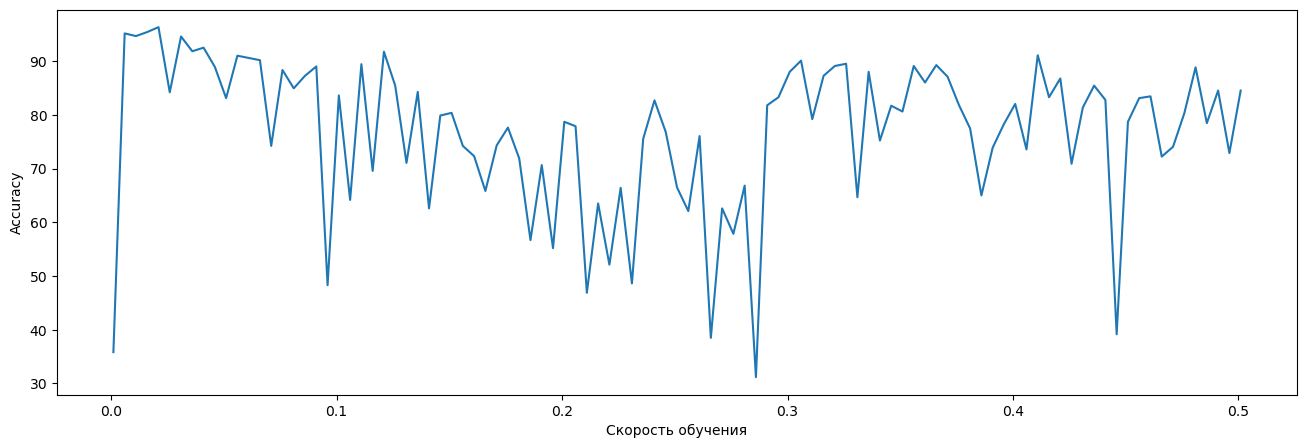

In [20]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(res_learning_rate['val'],res_learning_rate['last_error'])
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(res_learning_rate['val'],res_learning_rate['best_metric'])
plt.xlabel('Скорость обучения')
plt.ylabel('Accuracy')
plt.show()

По learning_rate сложно что-то сказать, хотя есть тенденция к уменьшению качества с увеличением скорости обучения.<br>
Возьмем скорость обучения 0.016.

Теперь рассмотрим параметр num_epochs - количество итераций.
Проверим значения от 50 до 1000 с шагом 50.
Число нейронов скрытого слоя зададим 49 и скорость обучения 0.016.

In [21]:
%%time
res_num_epochs = train_nn(X_train, y_train, 
             neuron_numb=49, 
             learning_rate=0.016, 
             num_epochs=200, 
             check_param='num_epochs', 
             min_value=50, 
             max_value=1000, 
             step=50)

CPU times: user 2min 18s, sys: 6.63 s, total: 2min 25s
Wall time: 1min 1s


In [22]:
res_num_epochs[['val','last_error','last_metric','best_metric']].sort_values(by='best_metric', ascending=False).head(10)

,val,last_error,last_metric,best_metric
19,1000,0.003908,99.916874,99.916874
18,950,0.004078,99.916874,99.916874
17,900,0.004269,99.916874,99.916874
16,850,0.004486,99.916874,99.916874
15,800,0.004738,99.833749,99.833749
14,750,0.005034,99.833749,99.833749
13,700,0.005380,99.833749,99.833749
12,650,0.005774,99.833749,99.833749
11,600,0.006216,99.667498,99.667498
10,550,0.006714,99.584372,99.584372


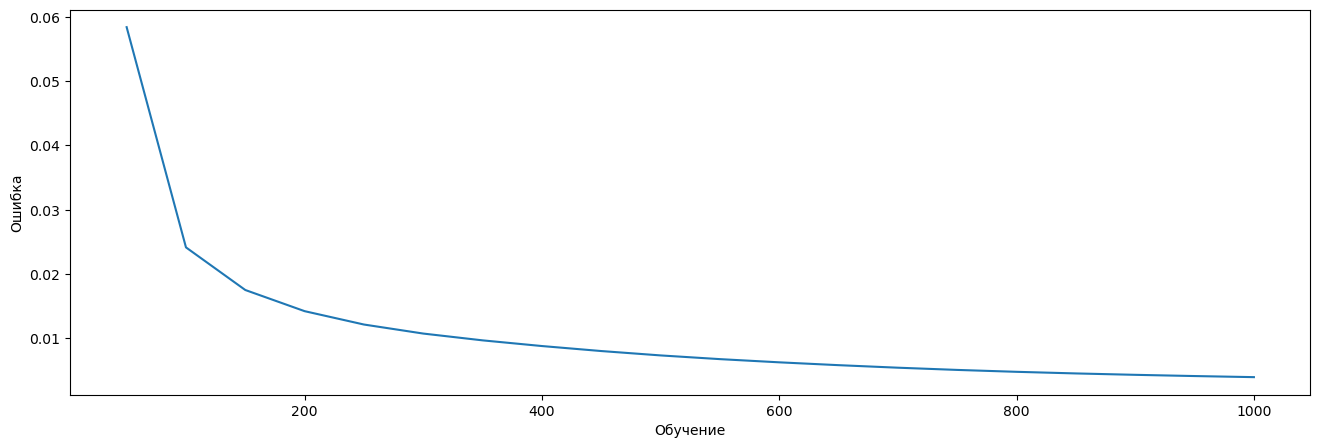

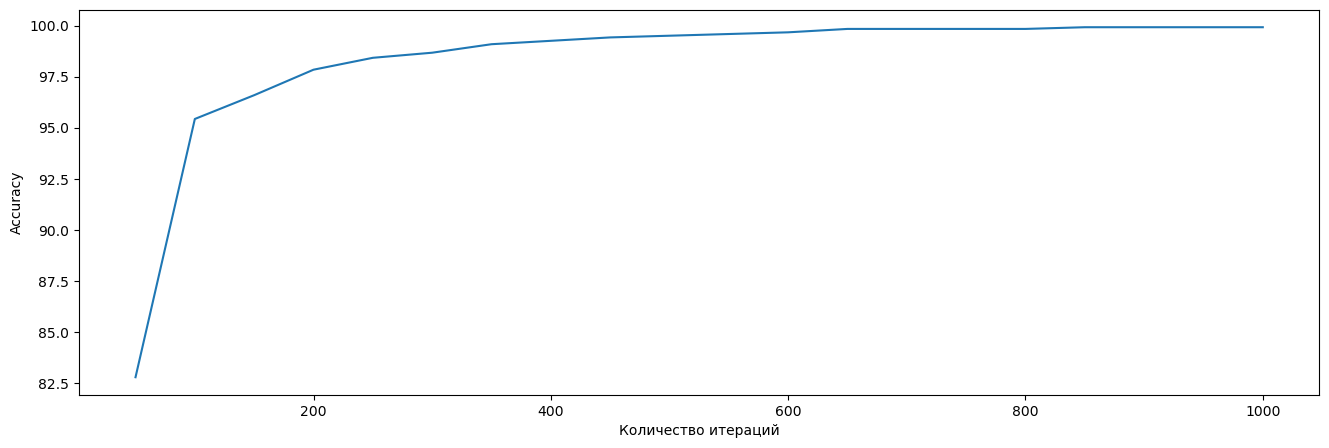

In [23]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(res_num_epochs['val'],res_num_epochs['last_error'])
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(res_num_epochs['val'],res_num_epochs['best_metric'])
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

Чем больше итераций, тем выше качество, но возможно мы так переобучаемся.<br>
Возьмем количество итераций 1000.

Посмотрим на результат при neuron_numb=49, learning_rate=0.016, num_epochs=1000.

In [24]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 49

# присваивание случайных весов
np.random.seed(0)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.016

# количество итераций
num_epochs = 1000

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    #  с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

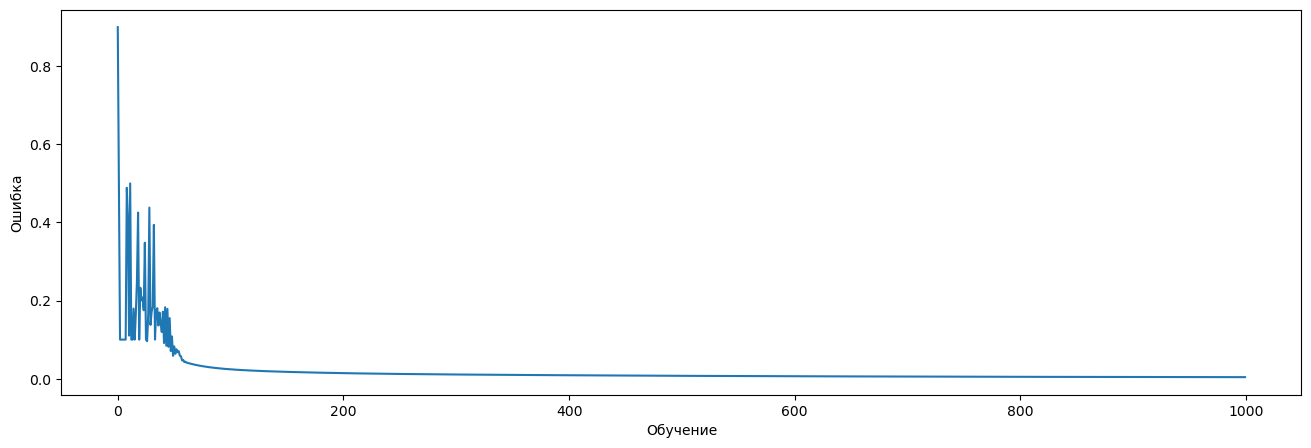

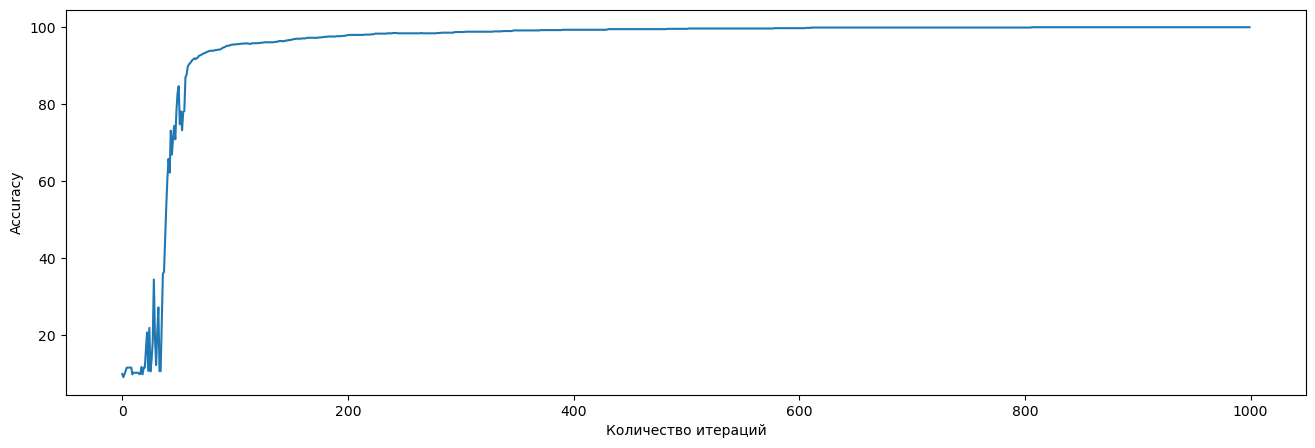

In [25]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

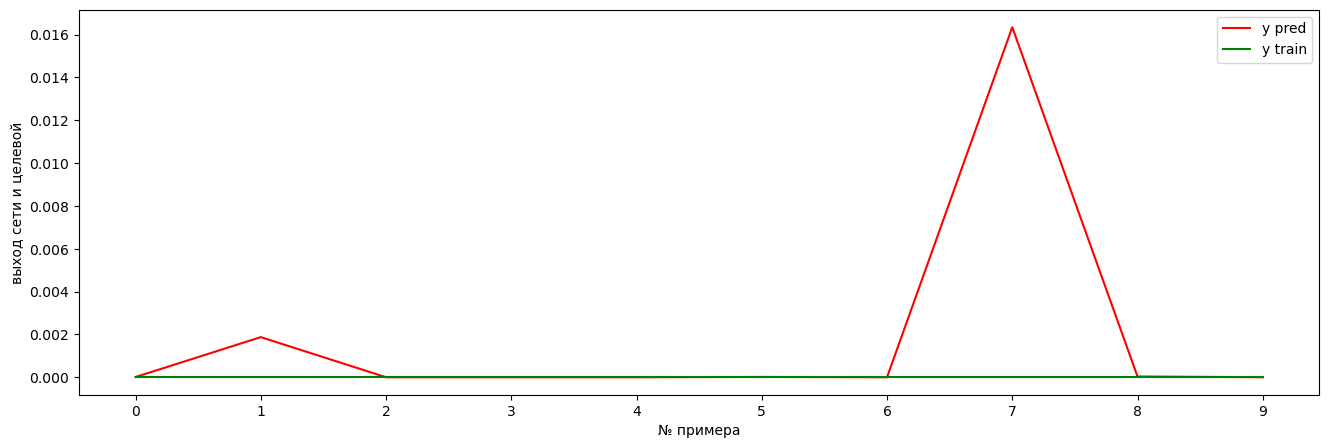

accuracy на обучении 99.92%


In [26]:
N = 10
label = 1
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

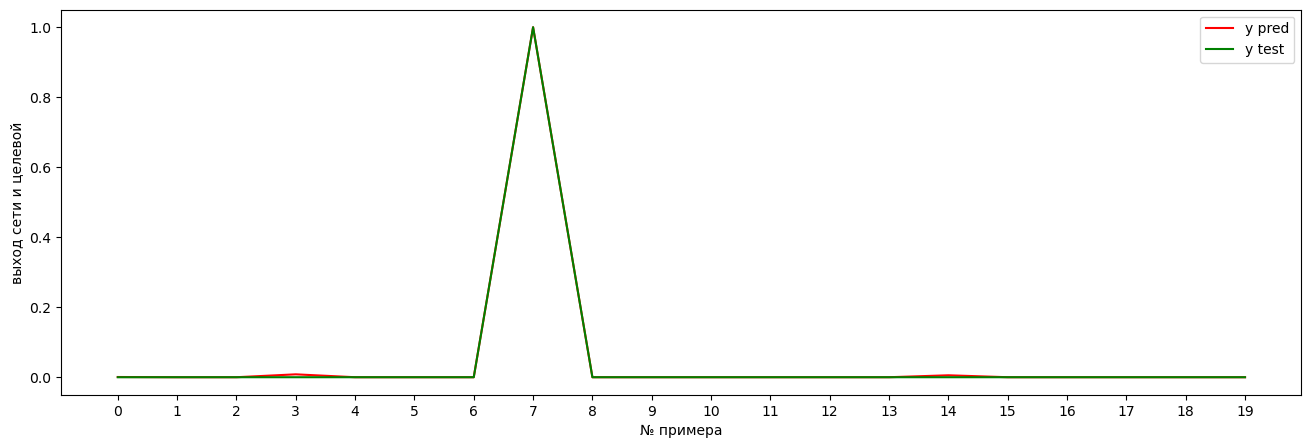

accuracy на тесте 95.62%


In [27]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

Выводы: 
1. При увеличении числа нейронов скрытого слоя качество возрастает.
2. При увеличении скорости обучения качество ухудшается.
3. При увеличении количества итераций качество возрастает.